# Link Dashboard Tableau

https://public.tableau.com/views/Milestone1_16716301583450/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

# Introduction

Hi, my name Fauzan Nurachman a.k.a Ojan from class Full Time Data Science Batch 003

# Problem Identification

Problem Statement: Knowing the sales trend of used BMW brand cars during Q1 - Q3 in 2018.

Elaboration of the problem with the 5W+1H method:

1. What : What type of BMW car sold best during Q1 - Q3?

2. Why: Why are BMW car sales fluctuating?

3. Who : Who will this report be submitted for?

4. Where : Where is the highest point on BMW car sales?

5. When : When is the lowest point in BMW car sales?

6. How : How does the price affect the type of convertible with a sedan?

# Data Loading

Importing Library

For the first time, we have to import pandas, matplotlib, scipy, seaborn and numpy library for processing, manipulating and visual the data that we are going to do.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

After we imported the library, we're looking for the data. Then we look for the dataset from kaggle.com and then this isi for the url https://www.kaggle.com/datasets/danielkyrka/bmw-pricing-challenge. 

After that we assign the variable to the DataFrame or df to continue processing the data.

In [49]:
df=pd.read_csv('/Users/macbook/Documents/milestone 1/bmw_pricing_challenge.csv')
df

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743,110,2015-10-01,diesel,black,van,False,True,False,False,False,False,True,False,14600,2018-08-01
4839,BMW,218 Active Tourer,49832,100,2015-06-01,diesel,grey,van,False,True,False,False,False,False,True,True,17500,2018-08-01
4840,BMW,218 Gran Tourer,19633,110,2015-10-01,diesel,grey,van,False,True,False,False,False,False,True,True,17000,2018-09-01
4841,BMW,218 Active Tourer,27920,110,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700,2018-09-01


From this data, we can see that there are 18 columns of data.

Let's see how many rows (index) there are with the .shape function.

In [50]:
df.shape

(4843, 18)

It turns out that there are 4843 rows and 18 columns. Then we check the data type with the .info() function. Its function is to find out what data types are in the existing row.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   maker_key          4843 non-null   object
 1   model_key          4843 non-null   object
 2   mileage            4843 non-null   int64 
 3   engine_power       4843 non-null   int64 
 4   registration_date  4843 non-null   object
 5   fuel               4843 non-null   object
 6   paint_color        4843 non-null   object
 7   car_type           4843 non-null   object
 8   feature_1          4843 non-null   bool  
 9   feature_2          4843 non-null   bool  
 10  feature_3          4843 non-null   bool  
 11  feature_4          4843 non-null   bool  
 12  feature_5          4843 non-null   bool  
 13  feature_6          4843 non-null   bool  
 14  feature_7          4843 non-null   bool  
 15  feature_8          4843 non-null   bool  
 16  price              4843 non-null   int64 


After we look at the info, there is no missing values on this dataset but we check it again with .isnull().sum() . 

In [52]:
df.isnull().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

Now we are going to see how many model type BMW there is in our dataframe:

In [53]:
df['model_key'].nunique()

75

We have `75` different model type BMW, but what are those 75 brands? Let's see: 

In [54]:
df['model_key'].value_counts()

320                  752
520                  633
318                  569
X3                   438
116                  358
                    ... 
220 Active Tourer      1
635                    1
M135                   1
225 Active Tourer      1
214 Gran Tourer        1
Name: model_key, Length: 75, dtype: int64

# Data Cleaning

In this section, we will clean up data that we don't use. First we will eliminate the columns that we do not use, those columns are columns feature_1 to feature_8. We do the .drop() function to remove the column.

In [55]:
df.drop(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8'], axis=1, inplace=True)
df

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,33400,2018-04-01
...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743,110,2015-10-01,diesel,black,van,14600,2018-08-01
4839,BMW,218 Active Tourer,49832,100,2015-06-01,diesel,grey,van,17500,2018-08-01
4840,BMW,218 Gran Tourer,19633,110,2015-10-01,diesel,grey,van,17000,2018-09-01
4841,BMW,218 Active Tourer,27920,110,2016-04-01,diesel,brown,van,22700,2018-09-01


After that, we do sorting by date to make it easier for us to get a monthly sales trend.

In [56]:
df1 = df.sort_values(by=['sold_at'], ascending=[True])
df1

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,11300,2018-01-01
314,BMW,318,243386,105,2013-11-01,diesel,white,estate,7700,2018-01-01
313,BMW,320,180574,135,2014-03-01,diesel,white,estate,14600,2018-01-01
312,BMW,320,171848,120,2013-09-01,diesel,black,estate,12700,2018-01-01
311,BMW,320,149390,135,2014-09-01,diesel,white,estate,11400,2018-01-01
...,...,...,...,...,...,...,...,...,...,...
2455,BMW,116,19919,85,2014-09-01,diesel,black,hatchback,16700,2018-09-01
2454,BMW,116,179112,85,2013-05-01,diesel,black,hatchback,9400,2018-09-01
2453,BMW,318 Gran Turismo,157398,100,2013-11-01,diesel,blue,hatchback,15500,2018-09-01
2034,BMW,116,169720,85,2012-07-01,diesel,blue,hatchback,8100,2018-09-01


After we have sorted from the sold_at column, we will do a further analysis in the Analysis and calculation section.

# Analysis and Calculation

1. What : What type of BMW car sold best during Q1 - Q3?

On this question, we will look for what types of BMW cars sold best during Q1 - Q3. We'll figure it out with the .groupby() function.

In [58]:
bmw_car = df1.groupby(df1['model_key']).count()['maker_key'].sort_values(ascending = False)
bmw_car

model_key
320               752
520               633
318               569
X3                438
116               358
                 ... 
ActiveHybrid 5      1
735                 1
635                 1
630                 1
i8                  1
Name: maker_key, Length: 75, dtype: int64

We can see that the <mark>BMW 320</mark> car type is the most sold car with 752 units from Q1 - Q3. Then we create a bar chart to see the distribution of the types of BMW cars that sold during Q1 - Q3. Let's take only 10 types of cars so that the visualizatio.

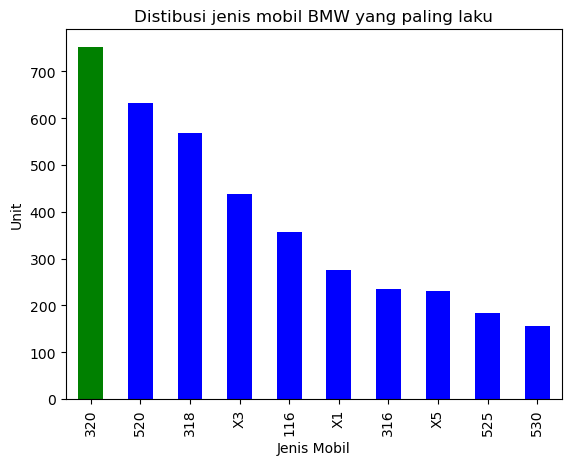

In [59]:
bmw_car.head(10).plot(kind='bar', xlabel = 'Jenis Mobil', ylabel = 'Unit', title = 'Distibusi jenis mobil BMW yang paling laku', color = ('green', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'));

From the chart above, it can be clearly seen that the <mark>BMW 320</mark> is the best-selling type of BMW car during Q1 - Q3.

2. Why: Why are BMW car sales fluctuating?

In this question, we will find out the trending sales per month.

In [60]:
trending_sale = df1.groupby(df1['sold_at']).count()['maker_key']
trending_sale

sold_at
2018-01-01    208
2018-02-01    502
2018-03-01    739
2018-04-01    693
2018-05-01    809
2018-06-01    604
2018-07-01    537
2018-08-01    528
2018-09-01    223
Name: maker_key, dtype: int64

We can see that our monthly sales are volatile, from low sales then high sales and finally low again. We'll display it using a line graph.

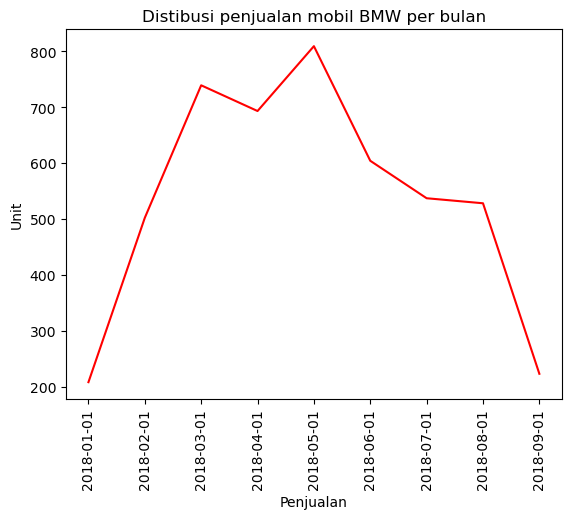

In [61]:
trending_sale.plot(kind='line', xlabel = 'Penjualan', ylabel = 'Unit', title = 'Distibusi penjualan mobil BMW per bulan', color = 'red');
plt.xticks(rotation=90);

In the chart above, we can know that BMW car sales experienced a significant fluctuation, at the beginning of Q1 it experienced a good increase but at the end of Q3 it decreased. This can be influenced by the decline in people's purchasing power towards used cars, because many people prefer to buy new cars that are clear for the future compared to used cars that do not know the history of previous users.

3. Who : Who will this report be submitted for?

Before we look for a view to later give to whom this report is, we will create a sales report for Q1 - Q3.

In [62]:
trending_sales = df1.groupby(df1['sold_at']).sum()['price']
trending_sales

sold_at
2018-01-01     3101000
2018-02-01     8054900
2018-03-01    11497600
2018-04-01    11114500
2018-05-01    12990500
2018-06-01     9260100
2018-07-01     8275900
2018-08-01     8884800
2018-09-01     3476100
Name: price, dtype: int64

We'll display that data using a bar graph.

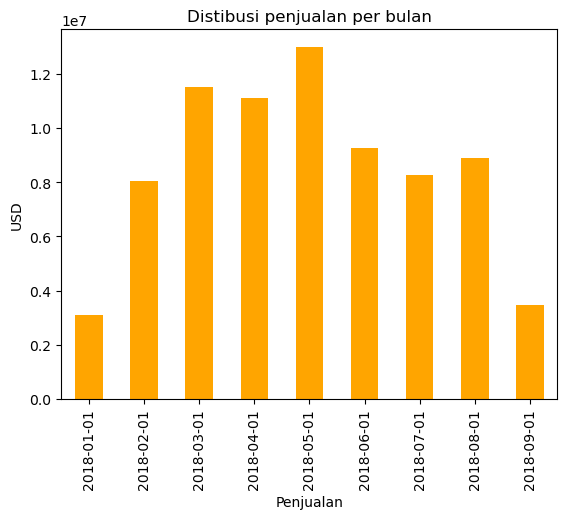

In [63]:
trending_sales.plot(kind='bar', xlabel = 'Penjualan', ylabel = 'USD', title = 'Distibusi penjualan per bulan', color = 'orange');

We can see that this is a sales chart based on USD. So who is this report for is for <mark>investors who want to invest</mark>, because we will display sales reports based on income, by units, and trends between Q1 - Q3. With such reports whether investors are interested in investing or not.

4. Where : Where is the highest point on BMW car sales?

5. When : When is the lowest point in BMW car sales?

We will answer 2 answers in this section. We do the calculation of income by month.

In [64]:
sales = df1.groupby(df1['sold_at']).sum()['price'].sort_values(ascending = False)
sales

sold_at
2018-05-01    12990500
2018-03-01    11497600
2018-04-01    11114500
2018-06-01     9260100
2018-08-01     8884800
2018-07-01     8275900
2018-02-01     8054900
2018-09-01     3476100
2018-01-01     3101000
Name: price, dtype: int64

We can see that sales were highest in <mark>May</mark> and sales were lowest in <mark>January</mark>. Let's take a look with the bar graph.

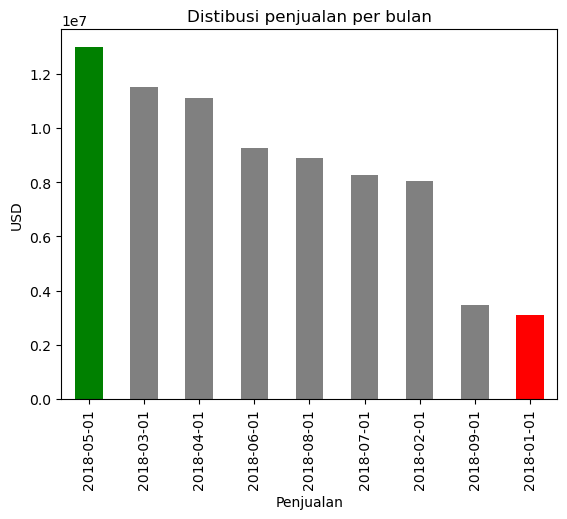

In [65]:
sales.plot(kind='bar', xlabel = 'Penjualan', ylabel = 'USD', title = 'Distibusi penjualan per bulan', color = ('green', 'grey', 'grey','grey','grey', 'grey', 'grey', 'grey', 'red'));

From the chart above, we can see that sales are highest in <mark>May</mark> and sales are lowest in <mark>January</mark>. This can be influenced by the large number of unit stocks that we have, because if our unit stock is small, there are not many sales.

6. How : How does the price affect the type of convertible with a sedan?

Before we do the hypothesis, we do a central tendency calculation on the price of the car being sold. We will use the sales data in USD.

In [66]:
trending_sales.to_frame()


,price
sold_at,
2018-01-01,3101000
2018-02-01,8054900
2018-03-01,11497600
2018-04-01,11114500
2018-05-01,12990500
2018-06-01,9260100
2018-07-01,8275900
2018-08-01,8884800
2018-09-01,3476100


After that we do a search for the central tendency which includes mean, median, mode, minimum, max, and standard deviation.

In [67]:
car_mean = df1['price'].mean()
car_median = df1['price'].median()
car_mode = df1['price'].mode()[0]
car_min = df1['price'].min()
car_max = df1['price'].max()
car_sd = df1['price'].std()

print('Mean :', car_mean)
print('Median :', car_median)
print('Mode :', car_mode)
print('Minimum :', car_min)
print('Max :', car_max)
print('Standard Deviation :', car_sd)

Mean : 15828.081767499483
Median : 14200.0
Mode : 13100
Minimum : 100
Max : 178500
Standard Deviation : 9220.285683615683


From the data above, we can find out the central tendency of the price of the car sold. After that we do a skewness search with the intention of the price distribution whether there is a lame one or not.

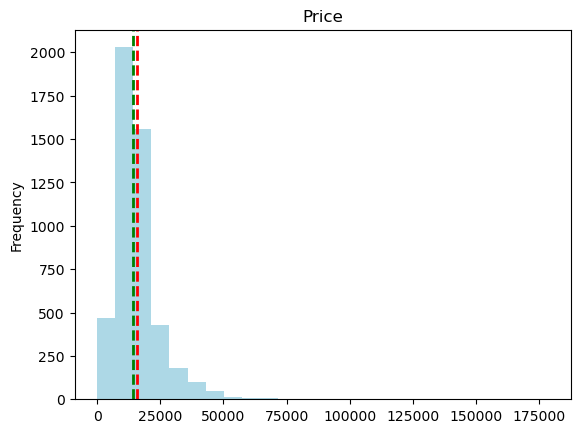

In [68]:
df1['price'].plot.hist(title='Price', color='lightblue', bins=25)  
plt.axvline(df1['price'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(df1['price'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

In [69]:
df1['price'].skew()

3.3236070227075585

From the data above, it turns out that our data is not normally distributed, so the data is a right skew. So that our data distribution is normal, we will do outliers. Here we do the disposal of outliers:

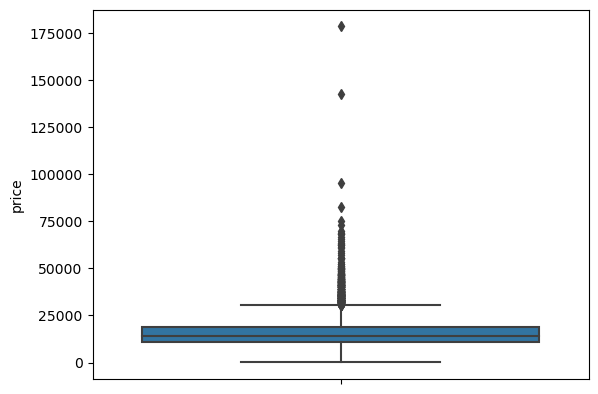

In [70]:
sns.boxplot(data=df1, y = 'price');

From the results of the skewness search, we can see that the skewness value is above 2 which means a distribution in a positive direction where the data is abnormal. It is likely that the data is spread over a small range, so there are data outliers found on the sales price.

Then we proceed to look for outliers by looking for the upper limit and the lower limit first.

In [71]:
outliers_plus = car_mean + 3*car_sd
outliers_plus

43488.938818346534

In [72]:
outliers_minus = car_mean - 3*car_sd
outliers_minus

-11832.775283347564

Once we get the upper limit and the lower limit we do a search for any index.

In [73]:
df1_upper = df1.loc[df['price'] > outliers_plus]
df1_up = df1_upper.index.to_list()
df1_up

[3824,
 3829,
 3741,
 3958,
 68,
 2680,
 2678,
 1,
 72,
 2824,
 2775,
 4102,
 4092,
 4018,
 4053,
 4066,
 4109,
 4131,
 2938,
 2944,
 4151,
 4110,
 4116,
 4140,
 4146,
 4214,
 90,
 4194,
 67,
 3069,
 4282,
 4233,
 4235,
 4219,
 3092,
 4317,
 4339,
 4353,
 115,
 4372,
 4480,
 4446,
 4439,
 4457,
 4271,
 3345,
 3292,
 3320,
 4513,
 4508,
 4598,
 4551,
 4621,
 4614,
 4684,
 4671,
 4666,
 4665,
 4743,
 4641,
 4749,
 4631,
 4753,
 4728,
 4731,
 4265,
 3918,
 4782,
 4795,
 3588,
 3595]

In [74]:
df1_bot = df1.loc[df['price'] < outliers_minus]
df1_bot

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,price,sold_at


After we get the index, we do the outliers dump.

In [75]:
df1_new = df1.drop(index=df_up)

Once we do the disposal of outliers. We check again whether there has been a change or not.

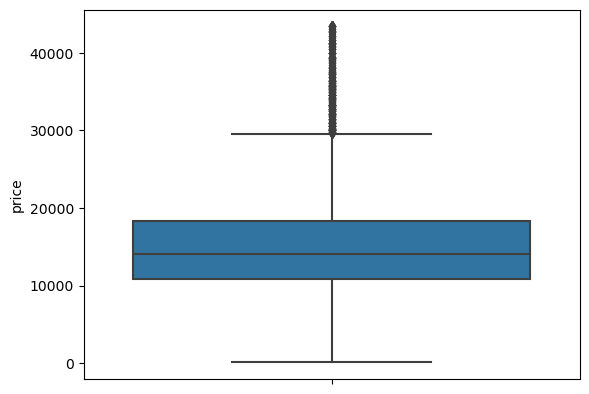

In [76]:
sns.boxplot(data=df1_new, y = 'price');

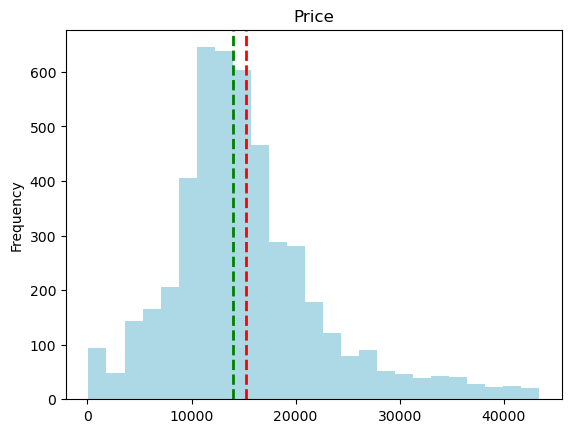

In [77]:
df1_new['price'].plot.hist(title='Price', color='lightblue', bins=25)  
plt.axvline(df1_new['price'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(df1_new['price'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

In [78]:
df1_new['price'].skew()

1.0732727853117303

After we see from the visualization above that our data has turned into <mark> normal data distribution</mark>. We can see the skewness in <mark>1.07</mark>.

Let's proceed with the creation of a hypothesis.

Then we enter the hypothesis test.

We use 2 samples and 2 tails:

H0 : μ PRICE CAR WITH CONVERTIBLE TYPE = μ PRICE CAR WITH SEDAN TYPE

H1 : μ PRICE CAR WITH CONVERTIBLE TYPE != μ PRICE CAR WITH SEDAN TYPE

In this case, we will compare the price of a convertible car with the price of a sedan car against the sales price.

After that we do a t-test on both sites.

In [79]:
convertible = df1[df1['car_type'] == 'convertible']
convertible

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,11300,2018-01-01
7,BMW,118,115560,105,2009-08-01,petrol,white,convertible,6100,2018-02-01
6,BMW,325,205219,145,2009-05-01,diesel,grey,convertible,12400,2018-02-01
5,BMW,335,152352,225,2011-05-01,petrol,black,convertible,17100,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,25100,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,10200,2018-02-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,69700,2018-02-01
13,BMW,420,77061,135,2015-08-01,diesel,black,convertible,36300,2018-03-01
12,BMW,420,132025,135,2014-03-01,diesel,blue,convertible,21700,2018-03-01
11,BMW,325,228000,145,2009-09-01,diesel,black,convertible,13300,2018-03-01


In [80]:
sedan = df1[df1['car_type'] == 'sedan']
sedan

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,price,sold_at
2556,BMW,118,115233,105,2009-09-01,diesel,blue,sedan,8200,2018-01-01
2558,BMW,320,130961,120,2015-03-01,diesel,blue,sedan,17800,2018-01-01
2559,BMW,730,94390,190,2014-06-01,diesel,grey,sedan,32700,2018-01-01
2560,BMW,320,165053,127,2013-05-01,petrol,black,sedan,10900,2018-01-01
2561,BMW,520,166606,135,2013-08-01,diesel,black,sedan,18800,2018-01-01
...,...,...,...,...,...,...,...,...,...,...
2545,BMW,520,169783,135,2012-07-01,petrol,beige,sedan,13700,2018-09-01
2520,BMW,730,200887,155,2005-03-01,diesel,silver,sedan,5800,2018-09-01
2494,BMW,318,367523,87,1998-09-01,petrol,silver,sedan,700,2018-09-01
2471,BMW,520,146541,120,2011-08-01,diesel,brown,sedan,14600,2018-09-01


Then we do a t-test of the price of the convertible at the price of the sedan:

In [81]:
# t-test
t_stat, p_val = stats.ttest_ind(convertible['price'], sedan['price'])
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.36230954983004227
t-statistics: 0.9113167847725847


Once we get the P-value then we proceed with creating a visualization that illustrates that is significant or not.

-7029.009237266797
41301.34966279872


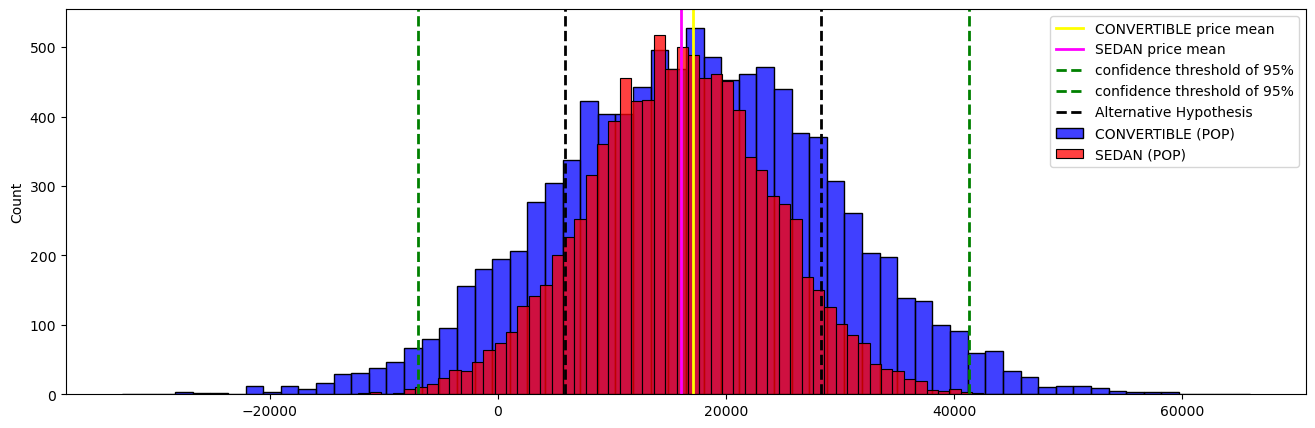

In [82]:
# simulation
convertible_pop = np.random.normal(convertible['price'].mean(),convertible['price'].std(),10000)
sedan_pop = np.random.normal(sedan['price'].mean(),sedan['price'].std(),10000)

# confidence interval based on ORGANICS BY GOSH
confidence_interval = stats.norm.interval(0.95, convertible['price'].mean(), convertible['price'].std())

plt.figure(figsize=(16,5))
sns.histplot(convertible_pop, label='CONVERTIBLE (POP)',color='blue')
sns.histplot(sedan_pop, label='SEDAN (POP)',color='red')

# mean
plt.axvline(convertible['price'].mean(), color='yellow', linewidth=2, label='CONVERTIBLE price mean')
plt.axvline(sedan['price'].mean(), color='magenta',  linewidth=2, label='SEDAN price mean')

plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# alternative hypotesis
plt.axvline(convertible_pop.mean()+t_stat*convertible_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(convertible_pop.mean()-t_stat*convertible_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(confidence_interval[0])
print(confidence_interval[1])

In the visualization above, we can know that the convertible mean and sedan mean are in the confidence interval where if a parameter is in the confidence interval then the condition is <mark>insignificant</mark>. So our hypothesis i.e. <mark>H0 is accepted</mark>. Therefore, the price of a convertible type with a sedan does <mark>not have a significant</mark> effect.

# Conclusion Making

From the data above, it can be concluded:

1. <mark>The BMW 320</mark> is the best-selling type of BMW car during Q1 - Q3.

2. BMW car sales experienced a significant fluctuation, at the beginning of Q1 it experienced a good increase but at the end of Q3 it experienced a decline. This can be influenced by the decline in people's purchasing power towards used cars, because many people prefer to buy new cars that are clear for the future compared to used cars that do not know the history of previous users.

3. So who is this report for, which is for investors who want to invest, because we will display sales reports based on income, by units, and trends between Q1 - Q3. With such reports whether investors are interested in investing or not.

4. Highest sales in <mark>May</mark> and lowest sales in <mark>January</mark>. This can be influenced by the large number of unit stocks that we have, because if our unit stock is small, there are not many sales.

5. In the visualization above, we can know that the <mark>convertible</mark> mean and <mark>sedan mean</mark> are in the confidence interval where if a parameter is in the confidence interval then the condition is <mark>insignificant</mark>. So our hypothesis i.e. <mark>H0 is accepted</mark>. Therefore, the price of a convertible type with a sedan does not have a significant effect.